In [11]:
import pandas as pd
import seaborn as sns

In [12]:
data = pd.read_csv ("StressLevelDataset.csv")

In [13]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [16]:
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


<Axes: >

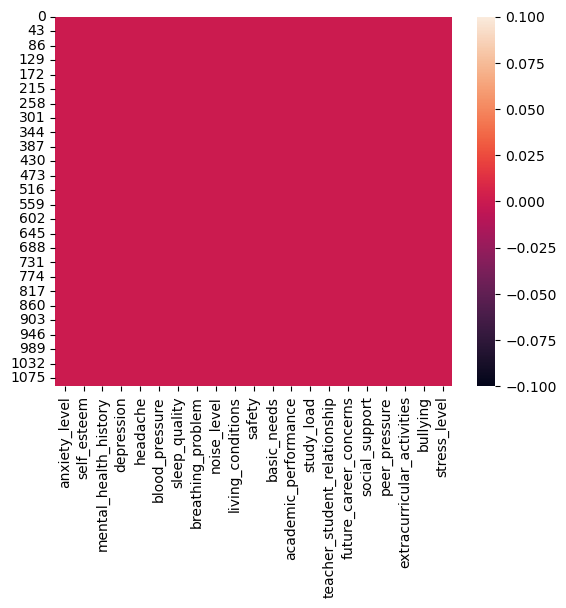

In [17]:
sns.heatmap(data.isnull())

In [18]:
data.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [21]:
data.drop(["anxiety_level"], axis = 1, inplace = True)
data.head()

,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,20,0,11,2,1,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1
1,8,1,15,5,3,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2
2,18,1,14,2,1,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1
3,12,1,15,4,3,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2
4,28,0,7,2,3,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   self_esteem                   1100 non-null   int64
 1   mental_health_history         1100 non-null   int64
 2   depression                    1100 non-null   int64
 3   headache                      1100 non-null   int64
 4   blood_pressure                1100 non-null   int64
 5   sleep_quality                 1100 non-null   int64
 6   breathing_problem             1100 non-null   int64
 7   noise_level                   1100 non-null   int64
 8   living_conditions             1100 non-null   int64
 9   safety                        1100 non-null   int64
 10  basic_needs                   1100 non-null   int64
 11  academic_performance          1100 non-null   int64
 12  study_load                    1100 non-null   int64
 13  teacher_student_relationship  110

In [27]:
y = data["mental_health_history"]
x = data.drop(["mental_health_history"], axis = 1)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.24861241, -0.20139257, -0.36074135, ...,  0.16424895,
        -0.40337716,  0.00442758],
       [-1.09358954,  0.31650766,  1.76885873, ...,  1.57576339,
         1.5570715 ,  1.22201077],
       [ 0.02491208,  0.18703261, -0.36074135, ..., -0.54150826,
        -0.40337716,  0.00442758],
       ...,
       [ 0.91971338, -1.23719303, -1.07060804, ..., -0.54150826,
        -1.05686005, -1.21315562],
       [-1.98839084,  0.8344079 ,  1.76885873, ...,  0.87000617,
         0.90358861,  1.22201077],
       [-1.31728986,  0.31650766,  0.34912535, ..., -1.24726548,
         0.90358861,  1.22201077]])

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 22)

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [35]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [37]:
y_test

1028    1
293     0
962     0
591     1
455     0
       ..
711     1
7       1
801     0
386     1
829     0
Name: mental_health_history, Length: 330, dtype: int64

In [39]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7575757575757576


In [43]:
from sklearn.pipeline import Pipeline

In [45]:
pipe = Pipeline([("scaler", StandardScaler()),("lr", LogisticRegression(max_iter=1000, solver="liblinear"))
])

In [47]:
param_grid = {"lr__C": [0.01, 0.1, 1, 10, 100],
 "lr__penalty": ["l1", "l2"]}

In [49]:
from sklearn.model_selection import GridSearchCV

In [51]:
grid = GridSearchCV(
 pipe,
 param_grid,
 cv=5,
 scoring="accuracy",
 n_jobs=-1
)

In [53]:
grid.fit(x_train, y_train)
print("Best params:", grid.best_params_)

Best params: {'lr__C': 0.01, 'lr__penalty': 'l1'}


In [55]:
from sklearn.metrics import classification_report
y_pred = grid.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Test accuracy: 0.7303030303030303
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       173
           1       0.72      0.70      0.71       157

    accuracy                           0.73       330
   macro avg       0.73      0.73      0.73       330
weighted avg       0.73      0.73      0.73       330



In [57]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix (y_test, y_pred)
conf_mat

array([[131,  42],
       [ 47, 110]])

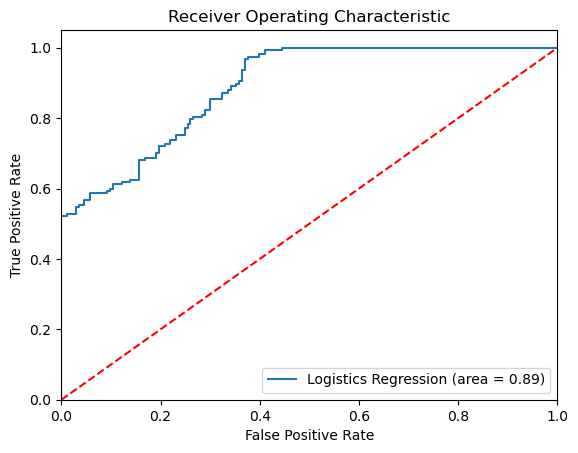

In [59]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_score = lr.predict_proba(x_test)[:,1]

logit_roc_auc = roc_auc_score(y_test, y_score)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, label="Logistics Regression (area = %0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

In [61]:
probs = lr.predict_proba(x_test)[:,1]
print(probs[:20])

[0.98631501 0.64840455 0.00843526 0.98459437 0.59219358 0.25096545
 0.96891482 0.42204244 0.97239126 0.0170368  0.42858426 0.9827528
 0.56687479 0.59762822 0.65323773 0.48429292 0.98186157 0.64782619
 0.39253818 0.39227833]
